In [1]:
import File_for_accesing_src
from Standard_parameters import *
from Vicsek_hooke import *
import numpy as np
import matplotlib.pyplot as plt
from Quiver import *
from scipy.cluster.vq import whiten, kmeans, vq, kmeans2
from cluster_functions import *
from functions import *

In this file different properties from the clusters wille be anlysed

In [2]:
#Beginning with analysing different v 
v_list=np.linspace(0.01,0.3,10)
pos_for_different_v=np.load("Data/pos_with_different_v_0_01_to_0_3.npy" )
theta_for_different_v=np.load("Data/theta_with_different_v_0_01_to_0_3.npy" )

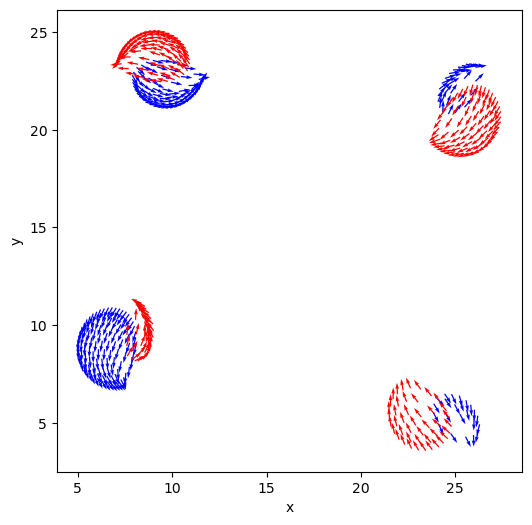

In [3]:
#First counting the number of cluster from quiver plot
%matplotlib inline
#First starting with velocity
#Here I will manually change the velocity index and then count the number of clusters 
velocity_index=9
v=v_list[velocity_index]
Quiver(pos_for_different_v[velocity_index][-1],theta_for_different_v[velocity_index][-1],['blue','red'])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [4]:
#In this cell the clusters will be indeified
#In the above cell I a plotting and counting the differe
amount_of_clusters_for_different_v=[6,4,7,6,4,5,5,4,4,4]
cluster_register_for_different_v=[ get_clusters(pos_for_different_v[j][-1],amount_of_clusters_for_different_v[j] ) for j in range(len(pos_for_different_v))] 

sorted_pos_for_different_v=[  sort_property_into_clusters(pos_for_different_v[j],cluster_register_for_different_v[j]) for j in range(len(pos_for_different_v))]
sorted_theta_for_different_v=[  sort_property_into_clusters(theta_for_different_v[j],cluster_register_for_different_v[j]) for j in range(len(pos_for_different_v))] 
centers_for_different_v=[find_centers(pos_for_different_v[j],cluster_register_for_different_v[j]) for j in range(len(pos_for_different_v))]

blue_cluster_register_for_different_v=[]
red_cluster_register_for_different_v=[]

#Now doing the red and blue sorting 
for j in range(len(pos_for_different_v)):
    reds,blues=filter_out_blue_and_red_from_cluster(cluster_register_for_different_v[j], int(N/2) )
    blue_cluster_register_for_different_v.append(blues)
    red_cluster_register_for_different_v.append(reds)


sorted_blue_pos_for_different_v=[  sort_property_into_clusters(pos_for_different_v[j],blue_cluster_register_for_different_v[j]) for j in range(len(pos_for_different_v))] 
sorted_blue_theta_for_different_v=[  sort_property_into_clusters(theta_for_different_v[j],blue_cluster_register_for_different_v[j]) for j in range(len(pos_for_different_v))]

sorted_red_pos_for_different_v=[  sort_property_into_clusters(pos_for_different_v[j],red_cluster_register_for_different_v[j]) for j in range(len(pos_for_different_v))] 
sorted_red_theta_for_different_v=[  sort_property_into_clusters(theta_for_different_v[j],red_cluster_register_for_different_v[j]) for j in range(len(pos_for_different_v))]


blue_centers_for_different_v=[find_centers(pos_for_different_v[j],blue_cluster_register_for_different_v[j]) for j in range(len(pos_for_different_v))]
red_centers_for_different_v=[find_centers(pos_for_different_v[j],red_cluster_register_for_different_v[j]) for j in range(len(pos_for_different_v))]


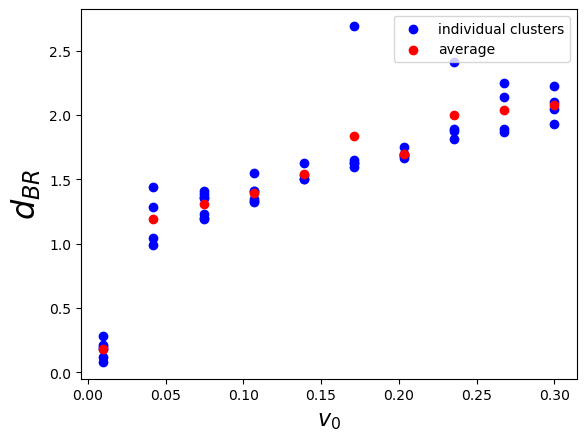

In [48]:
#Now I the distance between the red and blue centers will be looke at at the last iteration.

#blue_red_center_distances_different_v= [ [np.linalg.norm(blue_centers_for_different_v[j][m][-1]-red_centers_for_different_v[j][m][-1] ) for m in range(len(blue_centers_for_different_v[j]) )  ] for j in range(len(pos_for_different_v))   ]

use_this_number_of_iterations_from_the_end=500

#Using the average from cut_off
blue_red_center_distances_different_v= [ [np.average(np.linalg.norm(blue_centers_for_different_v[j][m]-red_centers_for_different_v[j][m],axis=1 )[-use_this_number_of_iterations_from_the_end:],axis=0 ) for m in range(amount_of_clusters_for_different_v[j] )  ] for j in range(len(v_list))   ]
                                       
#The average distance
avg_blue_red_center_distances_different_v=[ np.average(m ) for m in blue_red_center_distances_different_v] 


#Now I will make a scatter plot of the length and the length of the different clusters
for j in range(len(pos_for_different_v)):
    for di, distance in enumerate(blue_red_center_distances_different_v[j]):
                            if j==0 and di==0:
                                 plt.scatter(v_list[j],distance,color='blue',label='individual clusters')
                            else:
                                 plt.scatter(v_list[j],distance,color='blue')




plt.scatter(v_list,avg_blue_red_center_distances_different_v,color='red',label='average')
plt.ylabel(r'$d_{BR}$',fontsize=23)
plt.xlabel(r'$v_0$',fontsize=16)
plt.legend()
plt.savefig("Plots/Varying_velocity/red_center_blue_center_distance.pdf")

plt.show()

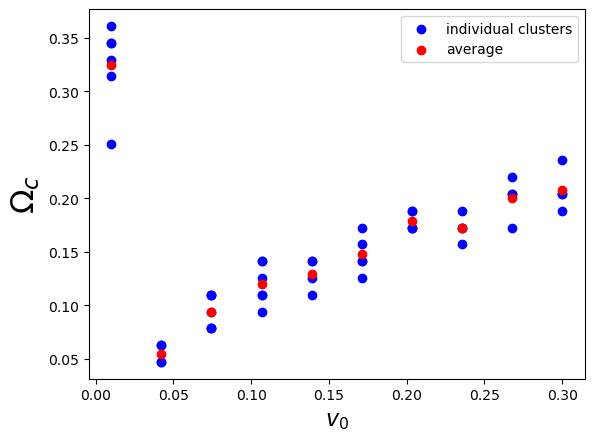

In [49]:
cut_off = 600
cluster_rotation_rates_different_v = []

# Calculate rotation rates for each cluster
for j in range(len(v_list)):
    S = []
    #Since there are 1000 iterations)

    #Looping over the clusters
    for m in range(len(blue_centers_for_different_v[j])):
        #omegas, fft = F([blue_centers_for_different_v[j][m], red_centers_for_different_v[j][m]], cut_off)
        omegas,fft=F2([blue_centers_for_different_v[j][m], red_centers_for_different_v[j][m]], cut_off)
        S.append(identify_peak(fft, omegas))
    cluster_rotation_rates_different_v.append(S)






#Also getting the average 
avg_cluster_rotation_rates_different_v=[np.average(omegas) for omegas in cluster_rotation_rates_different_v]

#Now creating scatter plots
for j in range(len(pos_for_different_v)):
    for m, omega in enumerate(cluster_rotation_rates_different_v[j]):
                  if m==0 and j==0:
                            plt.scatter(v_list[j],omega,color='blue',label='individual clusters')
                  else:
                            plt.scatter(v_list[j],omega,color='blue')

plt.scatter(v_list,avg_cluster_rotation_rates_different_v,color='red',label='average')
plt.ylabel(r'$\Omega_c$',fontsize=23)
plt.xlabel(r'$v_0$',fontsize=16)
plt.legend()
plt.savefig("Plots/Varying_velocity/cluster_rotation_rate_and_v0.pdf")
#plt.show()


The slope is 1.5060474031842863


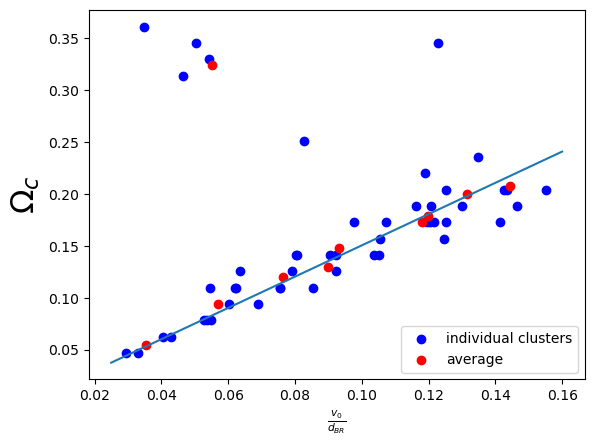

In [55]:
#Now lookin at  v_0/blue and red center distance


for j in range(len(pos_for_different_v)):
    for m,omega in enumerate(cluster_rotation_rates_different_v[j]) :
                            if m==0 and j==0:
                                 plt.scatter(v_list[j]/blue_red_center_distances_different_v[j][m],omega,color='blue',label='individual clusters')
                            else:
                                 plt.scatter(v_list[j]/blue_red_center_distances_different_v[j][m],omega,color='blue')

plt.scatter(v_list/avg_blue_red_center_distances_different_v,avg_cluster_rotation_rates_different_v,color='red',label='average' )


#Doing least squares with average
rise_avg=np.sum(avg_cluster_rotation_rates_different_v[1:],axis=0)/np.sum(v_list[1:]/avg_blue_red_center_distances_different_v[1:],axis=0 )


omega_sum=sum([ sum(k) for k in cluster_rotation_rates_different_v[1:]])
v_over_d_sum=sum([ v_list[j]*sum(1/np.array(blue_red_center_distances_different_v[j]) ) for j in range(1,len(v_list))  ])

rise_all=omega_sum/v_over_d_sum


q_for_plotting=np.linspace(0.025,0.16,100)
#plt.plot(q_for_plotting ,  rise_avg*q_for_plotting    )
plt.plot(q_for_plotting,rise_all*q_for_plotting)



plt.xlabel(r'$\frac{v_0}{d_{BR} }$',fontsize=11)
plt.ylabel(r'$\Omega_c$',fontsize=23)
plt.legend()
plt.savefig("Plots/Varying_velocity/Cluster_rotation_rate_and_v0_over_d.pdf")
print("The slope is" ,rise_all)

In [56]:
#Now studying motion without rotation


pos_rotation_removed_different_v=[]
theta_rotation_removed_different_v=[]
colors_rotation_removed_different_v=[]
for j in range(len(pos_for_different_v)):
    S_pos= []
    S_theta=[]
    S_color=[]
    for m in range(len(blue_centers_for_different_v[j])):
              pos,theta,colors=take_away_rotation(pos_for_different_v[j],theta_for_different_v[j],cluster_register_for_different_v[j][m]   ,blue_centers_for_different_v[j][m],int(N/2) )
              #Using transpose such that it get correct shape for F function
              S_pos.append(pos.transpose(1,0,2))
              S_theta.append(theta)
              S_color.append(colors)
    pos_rotation_removed_different_v.append( S_pos)
    theta_rotation_removed_different_v.append(S_theta)
    colors_rotation_removed_different_v.append(S_color)
    


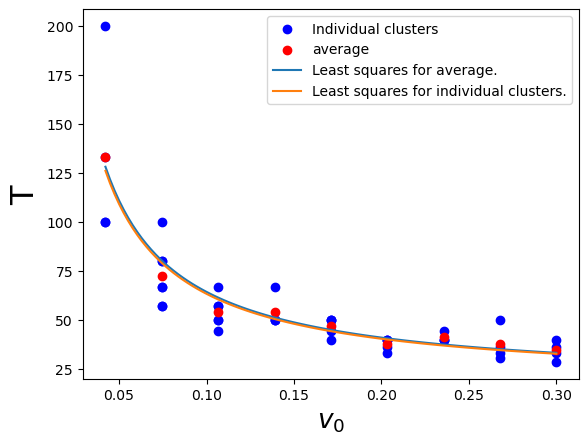

In [57]:
cut_off = 600
cluster_periods_different_v = []

# Calculate period for each cluster
for j in range(len(pos_for_different_v)):
    S = []
    for m in range(len(blue_centers_for_different_v[j])):
        omegas, fft = F2(    pos_rotation_removed_different_v[j][m], cut_off)
        S.append((2*np.pi)/identify_peak(fft, omegas))
    cluster_periods_different_v.append(S)


#The average 
avg_cluster_periods_different_v=[np.average(period) for period in cluster_periods_different_v]

for j in range(1,len(v_list)):
    for n, period in enumerate(cluster_periods_different_v[j]):
                               if j==1 and n==0:
                                         plt.scatter(v_list[j], period,color='blue', label = 'Individual clusters')
                               else:
                                          plt.scatter(v_list[j], period,color='blue')
#Plotting the average
plt.scatter(v_list[1:],avg_cluster_periods_different_v[1:],color='red',label='average')




#Now doing least sqaures with the following target function
def period_function(v_0,d,T_inf):
            return d/v_0+T_inf


#Using this to least squares
from scipy.optimize import curve_fit

#Variable to plot with
os=np.linspace(v_list[1],v_list[-1],100)


#Doing linear least sqaures based on a theory T=d/v_0+T_inf. Excluding the first point
#d,T_inf=np.polyfit(1/v_list[1:],avg_cluster_periods_different_v[1:],deg=1)
avg_p,_=curve_fit(period_function,v_list[1:], avg_cluster_periods_different_v[1:])
plt.plot(os,avg_p[0]/os+avg_p[1],label="Least squares for average.")


#Now doing with with weigths
weigths=np.array([1/np.var(k) for k in cluster_periods_different_v[1:]])
d_w,T_inf_w=np.polyfit(1/v_list[1:],avg_cluster_periods_different_v[1:],deg=1,w=weigths)
#plt.plot(os,d_w/os+T_inf_w,label="Weigthed least squares fit for average" )






# Ignore the first data point and prepare data
v_expanded = np.concatenate([[v] * len(period) for v, period in zip(v_list[1:], cluster_periods_different_v[1:])])
periods_flat = np.concatenate(cluster_periods_different_v[1:])


# Perform the linear least squares fitting with reciprocal values
#d_all, T_inf_all = np.polyfit(1 / v_expanded, periods_flat, deg=1)
all_p,_=curve_fit(period_function,v_expanded, periods_flat)
plt.plot(os,all_p[0]/os+all_p[1],label="Least squares for individual clusters.")




plt.ylabel('T',fontsize=23)
plt.xlabel(r'$v_0$',fontsize=19)
plt.legend()
plt.savefig('Plots/Varying_velocity/Period_for_different_v0.pdf')

In [59]:
#Pringting out the correspinding parameters
print(all_p)
print(avg_p)

[ 4.58512662 17.45662677]
[ 4.66467142 17.66037078]


In [123]:
d_all

4.585126553352434

In [12]:
#Now doing the same type of analysis for l

#The 2 in namin is due to it being the second list of l that have been tried

#Load data
pos_for_different_l2=np.load("Data/pos_with_different_l2.npy")
theta_for_different_l2=np.load("Data/theta_with_different_l2.npy")
l_list2=np.linspace(0.6,3,10)

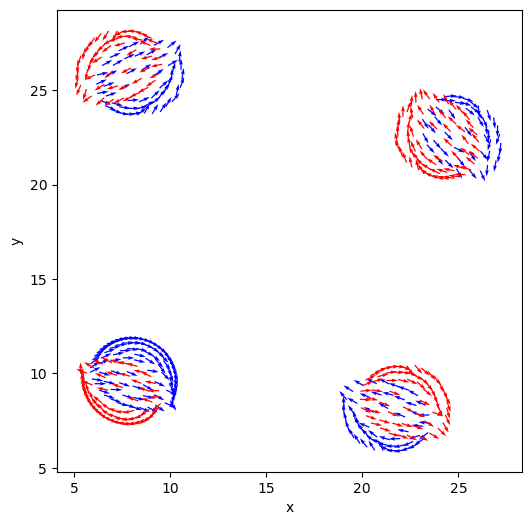

In [13]:
#First counting the number of cluster from quiver plot
%matplotlib inline
#First starting with velocity
#Here I will manually change the velocity index and then count the number of clusters 
l_index=-1
Quiver(pos_for_different_l2[l_index][-1],theta_for_different_l2[l_index][-1],['blue','red'])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [42]:

amount_of_clusters_for_different_l=np.array([10,8,9,6,7,5,7,6,4,4])


cluster_register_for_different_l=[ get_clusters(pos_for_different_l2[j][-1],amount_of_clusters_for_different_l[j] ) for j in range(len(pos_for_different_l2))] 

sorted_pos_for_different_l=[  sort_property_into_clusters(pos_for_different_l2[j],cluster_register_for_different_l[j]) for j in range(len(pos_for_different_l2))]
sorted_theta_for_different_l=[  sort_property_into_clusters(theta_for_different_l2[j],cluster_register_for_different_l[j]) for j in range(len(pos_for_different_l2))] 
centers_for_different_l=[find_centers(pos_for_different_l2[j],cluster_register_for_different_l[j]) for j in range(len(pos_for_different_l2))]

blue_cluster_register_for_different_l=[]
red_cluster_register_for_different_l=[]

#Now doing the red and blue sorting 
for j in range(len(pos_for_different_l2)):
    reds,blues=filter_out_blue_and_red_from_cluster(cluster_register_for_different_l[j], int(N/2) )
    blue_cluster_register_for_different_l.append(blues)
    red_cluster_register_for_different_l.append(reds)


sorted_blue_pos_for_different_l=[  sort_property_into_clusters(pos_for_different_l2[j],blue_cluster_register_for_different_l[j]) for j in range(len(pos_for_different_l2))] 
sorted_blue_theta_for_different_l=[  sort_property_into_clusters(theta_for_different_l2[j],blue_cluster_register_for_different_l[j]) for j in range(len(pos_for_different_l2))]

sorted_red_pos_for_different_l=[  sort_property_into_clusters(pos_for_different_l2[j],red_cluster_register_for_different_l[j]) for j in range(len(pos_for_different_l2))] 
sorted_red_theta_for_different_l=[  sort_property_into_clusters(theta_for_different_l2[j],red_cluster_register_for_different_l[j]) for j in range(len(pos_for_different_l2))]


blue_centers_for_different_l=[find_centers(pos_for_different_l2[j],blue_cluster_register_for_different_l[j]) for j in range(len(pos_for_different_l2))]
red_centers_for_different_l=[find_centers(pos_for_different_l2[j],red_cluster_register_for_different_l[j]) for j in range(len(pos_for_different_l2))]



Slope and itercept for average 0.4025824732501352 0.42706330106246937
Slope and itercept for average with weigth least squares 0.4332012962738971 0.30433894847750875
Slope and itercept for all clusters 0.3872562744284748 0.4551652218441496


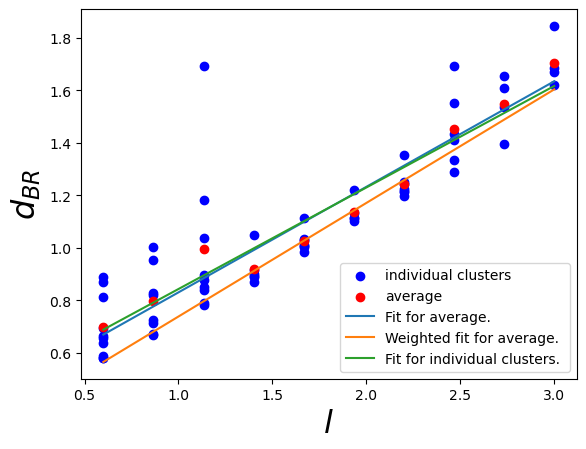

In [64]:
#Now I the distance between the red and blue centers will be looke at

#blue_red_center_distances_different_l=[ [ np.linalg.norm(blue_centers_for_different_l[j][m][-1]-red_centers_for_different_l[j][m][-1] ) for m in range(len(blue_centers_for_different_v[j]) )  ] for j in range(len(pos_for_different_v))   ]

usig_these_last_iterations=500

blue_red_center_distances_different_l = [
    [
        np.average(
            np.linalg.norm(
                blue_centers_for_different_l[j][m] - red_centers_for_different_l[j][m],
                axis=1
            )[-usig_these_last_iterations:],
            axis=0
        )
        for m in range(amount_of_clusters_for_different_l[j])
    ]
    for j in range(len(l_list2))
]


#The average distance
avg_blue_red_center_distances_different_l=[ np.average(m ) for m in blue_red_center_distances_different_l] 


#Now I will make a scatter plot of the length and the length of the different clusters
for j in range(len(pos_for_different_l2)):
    for di, distance in enumerate(blue_red_center_distances_different_l[j]):
                            if di==0 and j==0:
                                    plt.scatter(l_list2[j],distance,color='blue',label='individual clusters')
                            else:
                                    plt.scatter(l_list2[j],distance,color='blue')


plt.scatter(l_list2,avg_blue_red_center_distances_different_l,color='red',label='average')

#Doing a linear least square fit with average
slope_d, intercept_d= np.polyfit(l_list2,avg_blue_red_center_distances_different_l,deg=1 )
print("Slope and itercept for average", slope_d, intercept_d)
plt.plot(l_list2,slope_d*l_list2+intercept_d,label='Fit for average.')


#Now doing the weigthed version 1/variance will be the weigth
weigths=np.array([ 1/np.var(k) for k in blue_red_center_distances_different_l])
slope_w_d, intercept_w_d = np.polyfit(l_list2,avg_blue_red_center_distances_different_l,deg=1,w=weigths )
print("Slope and itercept for average with weigth least squares", slope_w_d, intercept_w_d)
plt.plot(l_list2,slope_w_d*l_list2+intercept_w_d,label='Weighted fit for average.')

# Flatten data to fit all distances
l_expanded = np.concatenate([[l] * len(d) for l, d in zip(l_list2, blue_red_center_distances_different_l)])
blue_red_center_distance_flat = np.concatenate(blue_red_center_distances_different_l)

# Fit using all data points
slope_all_d, intercept_all_d = np.polyfit(l_expanded, blue_red_center_distance_flat, deg=1)
print("Slope and itercept for all clusters", slope_all_d, intercept_all_d)
plt.plot(l_list2, slope_all_d * np.array(l_list2) + intercept_all_d, label='Fit for individual clusters. ')



plt.ylabel(r'$d_{BR}$',fontsize=23)
plt.xlabel('$l$',fontsize=23)
plt.legend()
plt.savefig("Plots/varying_l/blue_and_red_center_distance_l.pdf")

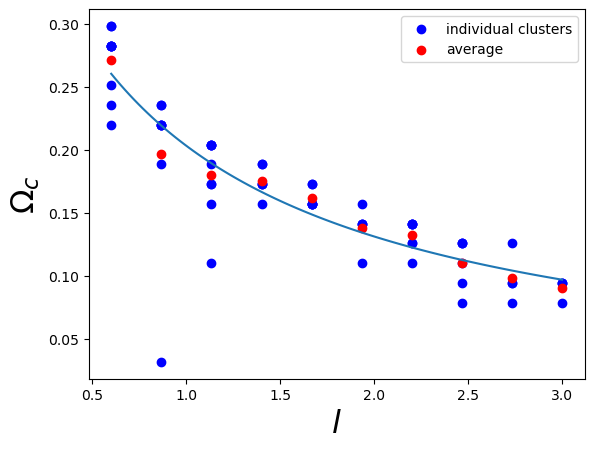

In [65]:
from scipy.optimize import curve_fit


#Now lookin at the cluster rotation rate 
cut_off = 600
cluster_rotation_rates_different_l = []

# Calculate rotation rates for each cluster
for j in range(len(l_list2)):
    S = []
    for m in range(len(blue_centers_for_different_l[j])):
        omegas, fft = F2([blue_centers_for_different_l[j][m], red_centers_for_different_l[j][m]], cut_off)
        S.append(identify_peak(fft, omegas))
    cluster_rotation_rates_different_l.append(S)




#Also getting the average 
avg_cluster_rotation_rates_different_l=[np.average(omegas) for omegas in cluster_rotation_rates_different_l]

#Now creating scatter plots
for j in range(len(pos_for_different_l2)):
    for m, omega in enumerate(cluster_rotation_rates_different_l[j]):
                    if m==0 and j==0:
                            plt.scatter(l_list2[j],omega,color='blue',label='individual clusters')
                    else:
                            plt.scatter(l_list2[j],omega,color='blue') 


#Now doing a curve fit with the following target function
def cluster_rate_function(l,a,b):
     return 1/(a*l+b)







# Flatten the nested rotation rates list
rotation_rates_flat = np.concatenate(cluster_rotation_rates_different_l)
# Expand l_list2 to match the structure of the flattened rotation rates
l_expanded = np.concatenate([[l] * len(o) for l, o in zip(l_list2, cluster_rotation_rates_different_l)])
parameters_for_curve,_=curve_fit(cluster_rate_function,l_expanded,rotation_rates_flat)
plotting_parameremeter=np.linspace(l_list2[0],l_list2[-1],100)
plt.plot(plotting_parameremeter,1/(parameters_for_curve[0]*plotting_parameremeter+parameters_for_curve[1]))



plt.scatter(l_list2,avg_cluster_rotation_rates_different_l,color='red',label='average')
plt.ylabel(r'$\Omega_c$',fontsize=23)
plt.xlabel('$l$',fontsize=23)
plt.legend()
plt.savefig('Plots/varying_l/omega_c_l.pdf')
plt.show()


In [66]:
parameters_for_curve

array([2.70589797, 2.21630897])

In [70]:
#Now getting the coeffecient of proborinality between v_0/d_BR and omega_c 
v_0=0.1
lamda=(slope_all_d/parameters_for_curve[0]+intercept_all_d/parameters_for_curve[0])/(2*v_0) 
print(lamda)


1.5566394341562655


The slope is 1.6578525952232785


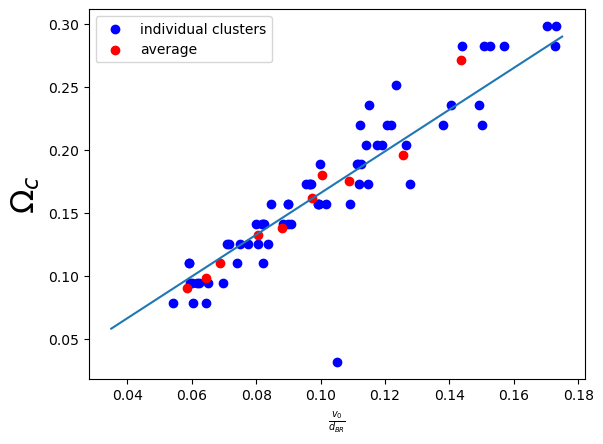

In [71]:
#Also defined in standard_parameters
v_0=0.1
#Now lookin at  v_0/blue and red center distance
for j in range(len(pos_for_different_l2)):
    for m,omega in enumerate(cluster_rotation_rates_different_l[j]) :
                            if j==0 and m==0:
                                  plt.scatter(v_0/blue_red_center_distances_different_l[j][m],omega,color='blue',label='individual clusters' )
                            else:
                                  plt.scatter(v_0/blue_red_center_distances_different_l[j][m],omega,color='blue') 


omega_sum=sum([ sum(k) for k in cluster_rotation_rates_different_l])
v_over_d_sum=sum([ v_0*sum(1/np.array(blue_red_center_distances_different_l[j]) ) for j in range(len(l_list2))  ])

rise_all=omega_sum/v_over_d_sum

plotting_variable=np.linspace(0.035,0.175,100)
plt.plot(plotting_variable,rise_all*plotting_variable)


plt.scatter(v_0/np.array(avg_blue_red_center_distances_different_l),avg_cluster_rotation_rates_different_l,color='red',label='average' )
plt.xlabel(r'$\frac{v_0}{d_{BR} }$',fontsize=10)
plt.ylabel(r'$\Omega_c$',fontsize=23)
plt.legend()
plt.savefig("Plots/Varying_l/Cluster_rotation_rate_and_v0_over_d.pdf")
print("The slope is",rise_all)

In [72]:
rise_all

1.6578525952232785

In [73]:
#Now studying motion without rotation


pos_rotation_removed_different_l=[]
theta_rotation_removed_different_l=[]
colors_rotation_removed_different_l=[]

for j in range(len(l_list2)):
    S_pos= []
    S_theta=[]
    S_color=[]
    for m in range(len(blue_centers_for_different_l[j])):
              pos,theta,colors=take_away_rotation(pos_for_different_l2[j],theta_for_different_l2[j],cluster_register_for_different_l[j][m]   ,blue_centers_for_different_l[j][m],int(N/2) )
              #Using transpose such that it get correct shape for F function
              S_pos.append(pos.transpose(1,0,2))
              S_theta.append(theta)
              S_color.append(colors)
    pos_rotation_removed_different_l.append( S_pos)
    theta_rotation_removed_different_l.append(S_theta)
    colors_rotation_removed_different_l.append(S_color)
    


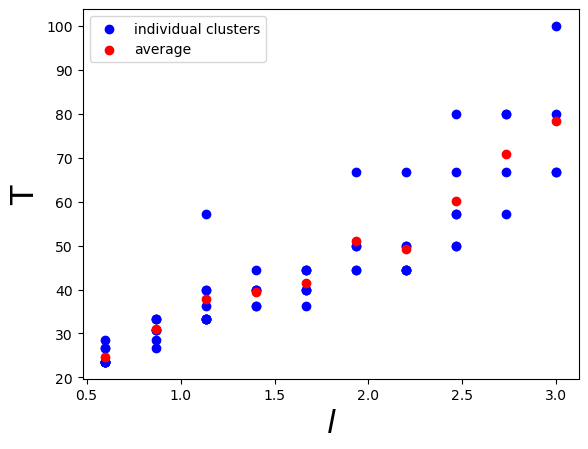

In [75]:
cut_off = 600
cluster_periods_different_l = []

# Calculate rotation rates for each cluster
for j in range(len(pos_for_different_l2)):
    S = []
    for m in range(len(blue_centers_for_different_l[j])):
        omegas, fft = F2(    pos_rotation_removed_different_l[j][m], cut_off)
        S.append((2*np.pi)/identify_peak(fft, omegas))
    cluster_periods_different_l.append(S)

#The average 
avg_cluster_periods_different_l=[np.average(period) for period in cluster_periods_different_l]

for j in range(len(pos_for_different_l2)):
    for m, period in enumerate(cluster_periods_different_l[j]):
        if j==0 and m==0:
                            plt.scatter(l_list2[j], period,color='blue',label='individual clusters')
        else:
                             plt.scatter(l_list2[j], period,color='blue')  
                    
                            
plt.scatter(l_list2,avg_cluster_periods_different_l,color='red',label='average')
plt.xlabel(r'$l$',fontsize=23)
plt.legend()
plt.ylabel('T',fontsize=23)
plt.savefig('Plots/varying_l/period.pdf')
plt.show()

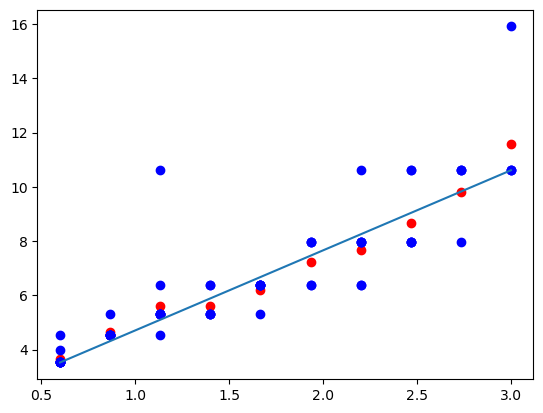

In [128]:
plt.scatter(l_list2,1/np.array(avg_cluster_rotation_rates_different_l),color='red')
for j in range(len(pos_for_different_l2)):
    for omega in cluster_rotation_rates_different_l[j]:
                            plt.scatter(l_list2[j],1/omega,color='blue')
#plt.ylabel(r'$\Omega_c$')
#plt.xlabel('\$l$')

slope_t,intercept_t=np.polyfit(l_list2,1/np.array(avg_cluster_rotation_rates_different_l) ,deg=1)
plt.plot(l_list2,slope_t*l_list2+intercept_t)



w_t=
slope_t2,intercept_t2=np.polyfit(l_list2,1/np.array(avg_cluster_rotation_rates_different_l) ,deg=1)
plt.plot(l_list2,slope_t2*l_list2+intercept_t2)




